In [17]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [9]:
workhr_nepal_1998_df = pd.read_csv('../data/1998/workinghr1998.csv')
workhr_nepal_2008_df = pd.read_csv('../data/2008/workinghr2008.csv')
workhr_nepal_2018_df = pd.read_csv('../data/2018/workinghr2018.csv')

Lets first create a single dataframe combining these three datas

In [13]:
workhr_nepal_1998_df['year'] = 1998
workhr_nepal_2008_df['year'] = 2008
workhr_nepal_2018_df['year'] = 2018

workhr_nepal_df = pd.concat([workhr_nepal_1998_df, workhr_nepal_2008_df, workhr_nepal_2018_df])



In [16]:
workhr_nepal_df.head()

,Occupation,Total,Male,Female,year
0,Total,39.4,42.6,36.3,1998
1,Legislators senior officials,51.0,51.8,41.4,1998
2,Professionals,39.7,40.1,36.3,1998
3,Technicians,39.5,39.6,39.0,1998
4,Clerks,44.1,44.4,41.6,1998


In [15]:
workhr_nepal_df.describe()

,Total,Male,Female,year
count,32.000000,32.000000,32.000000,32.000000
mean,44.590625,46.900000,39.184375,2007.687500
std,5.661435,5.318076,7.102799,8.224423
min,34.000000,37.000000,21.000000,1998.000000
25%,40.125000,42.900000,34.950000,1998.000000
50%,44.000000,46.400000,39.950000,2008.000000
75%,48.000000,51.000000,42.700000,2018.000000
max,58.600000,59.300000,54.500000,2018.000000


### Lets see the distribution of the work hours we have

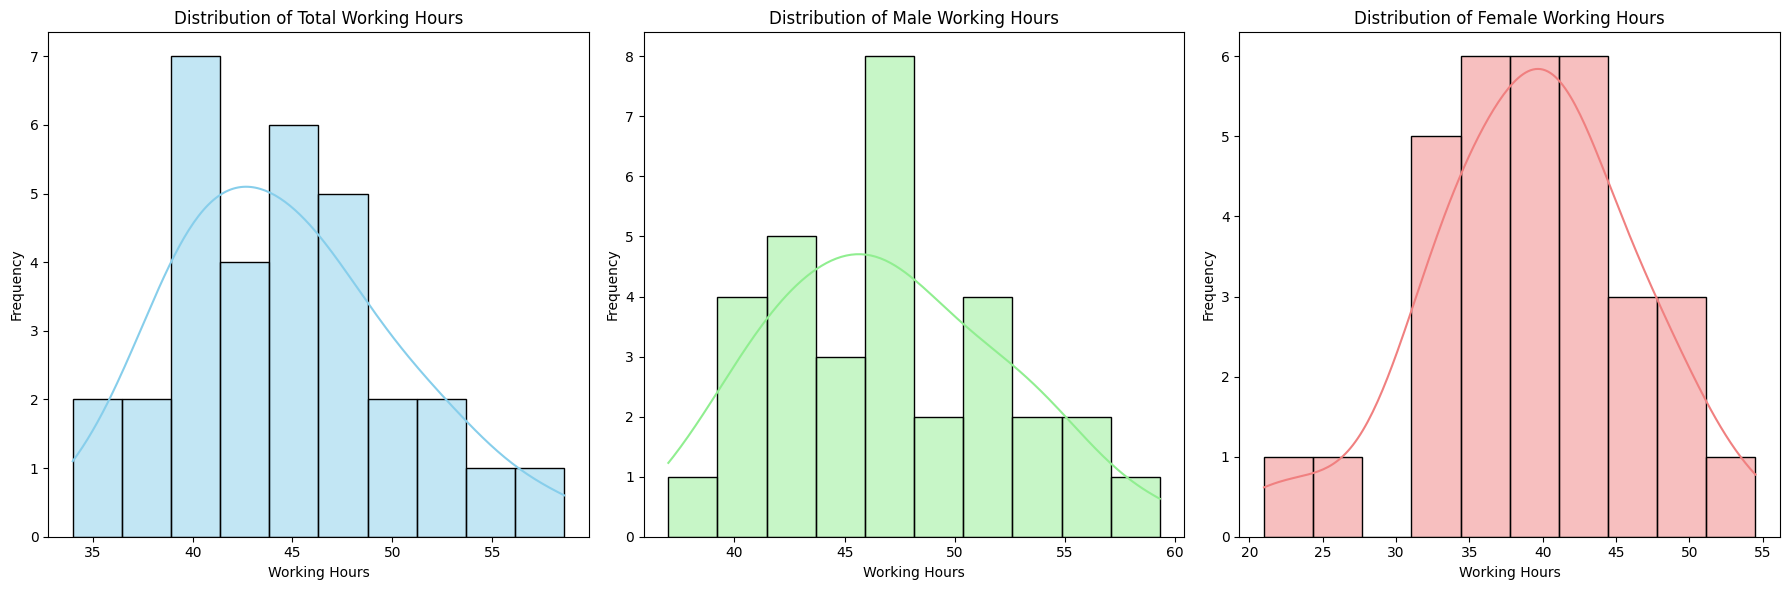

In [18]:
plt.figure(figsize=(18, 6))

# Total working hours histogram
plt.subplot(1, 3, 1)
sns.histplot(workhr_nepal_df['Total'], kde=True, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Working Hours')
plt.xlabel('Working Hours')
plt.ylabel('Frequency')

# Male working hours histogram
plt.subplot(1, 3, 2)
sns.histplot(workhr_nepal_df['Male'], kde=True, bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Male Working Hours')
plt.xlabel('Working Hours')
plt.ylabel('Frequency')

# Female working hours histogram
plt.subplot(1, 3, 3)
sns.histplot(workhr_nepal_df['Female'], kde=True, bins=10, color='lightcoral', edgecolor='black')
plt.title('Distribution of Female Working Hours')
plt.xlabel('Working Hours')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()
